In [4]:
import numpy as np
import re
from PIL import Image
import argparse
# import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential,Model
from keras.applications import xception
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
# from keras.layers.merge import add, concatenate
from keras.layers import add, concatenate
from keras.models import Model

In [5]:
def get_data(data_dir):
    data = []
    images=[]
    labels=["Others","MG","PET"]
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            image= os.path.join(path,img)
            image = tf.io.read_file(image)
            image = tf.io.decode_jpeg(image, channels=3)
            image = tf.image.resize(image, (200,200))
            image = tf.cast(image, tf.float64)
            data.append(image)
            images.append(class_num)
    return tf.stack(data),images

In [6]:
train,train_val = get_data('C:\Dataset - FYP -Final Year Project\Sampled')
print(type(train),type(train_val))
print(train,train_val)


test,test_val = get_data('C:\Dataset - FYP -Final Year Project\Train')
print(test,test_val)

<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'list'>
tf.Tensor(
[[[[1.33270004e+02 7.22699966e+01 5.42699966e+01]
   [1.25765999e+02 6.46340027e+01 4.67000008e+01]
   [1.29210007e+02 7.08700027e+01 5.61900024e+01]
   ...
   [1.59949997e+02 8.69400024e+01 7.66100006e+01]
   [1.56169830e+02 8.23019638e+01 6.92359009e+01]
   [1.67075745e+02 9.24621277e+01 7.60000000e+01]]

  [[1.31757996e+02 7.37579956e+01 5.37460022e+01]
   [1.31728012e+02 7.37480087e+01 5.35520096e+01]
   [1.26459999e+02 6.69099960e+01 5.43999977e+01]
   ...
   [1.57399994e+02 8.54599991e+01 7.14199982e+01]
   [1.48592499e+02 8.05325012e+01 5.95525017e+01]
   [1.65711349e+02 9.05647583e+01 7.63049545e+01]]

  [[1.38589996e+02 7.56800003e+01 5.74099998e+01]
   [1.40150009e+02 7.90800247e+01 6.12900200e+01]
   [1.35550003e+02 7.50000000e+01 5.65499954e+01]
   ...
   [1.63600006e+02 9.66000061e+01 7.24000092e+01]
   [1.51989990e+02 8.09899902e+01 6.28498535e+01]
   [1.64279297e+02 9.56491165e+01 7.28591766e

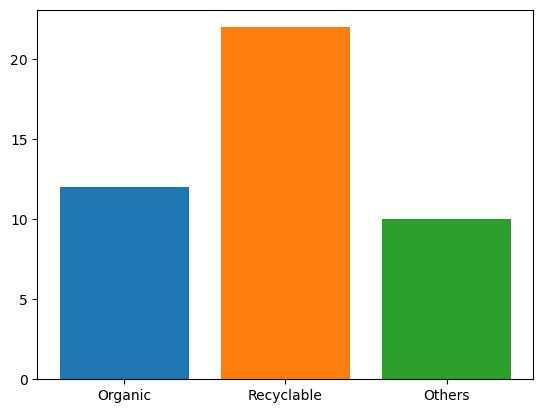

In [8]:
plot_array = []
m=0
o=0
p=0

for i in train_val:
    if(i== 0):
        plot_array.append("Others")
        m+=1

    elif(i==1):
        plot_array.append("MG")
        p+=1

    elif(i==2):
        plot_array.append("PET")
        o+=1
        
plt.bar("Organic",o)
plt.bar("Recyclable",r)
plt.bar("Others",p)

plt.show()

In [9]:
def cnn_model():
    
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(200,200,3)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='sigmoid'))
    model.add(Flatten())
              
    model.summary()
              
    return model


In [10]:
model = cnn_model()
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
train_val=tf.cast(list(map(int,train_val)),tf.int32)
test_val=tf.cast(list(map(int,test_val)),tf.int32)
#train_val=tf.reshape(train_val,(-1,1))
fitting_model=model.fit(x =train,y=train_val,validation_split=0.1,epochs=5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 198, 198, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 196, 196, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 98, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 98, 98, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 64)        18496     
                                                        

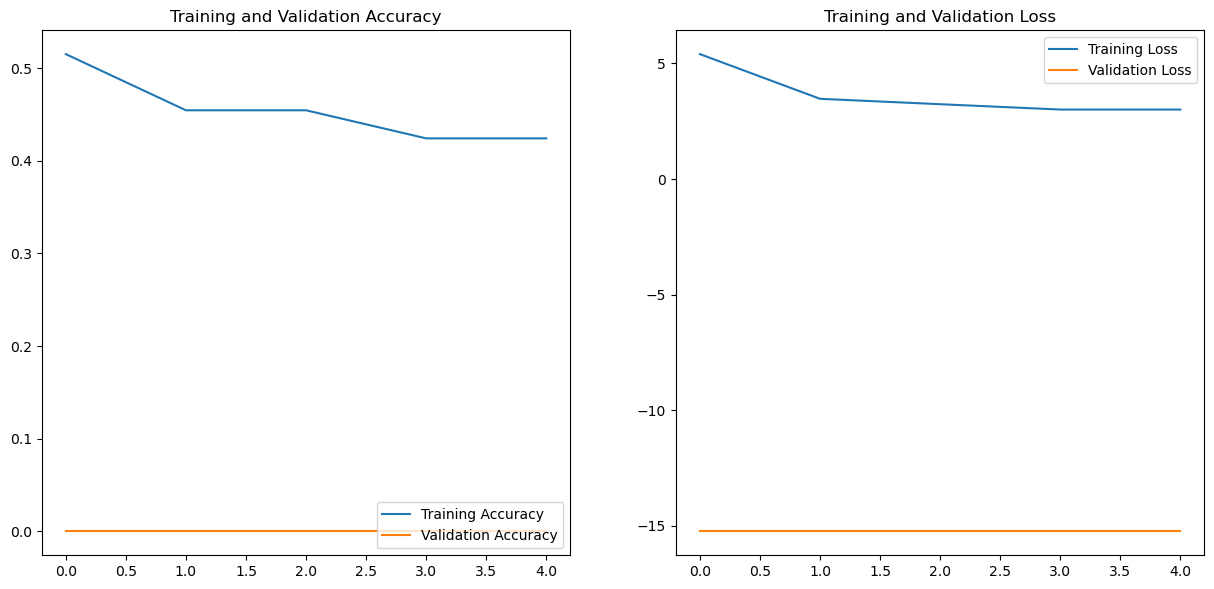

In [11]:
assign = {'0':'Organic','1':"Inorganic"}
epochs_range = range(5)
acc = fitting_model.history['accuracy']
val_acc = fitting_model.history['val_accuracy']
loss = fitting_model.history['loss']
val_loss = fitting_model.history['val_loss']

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


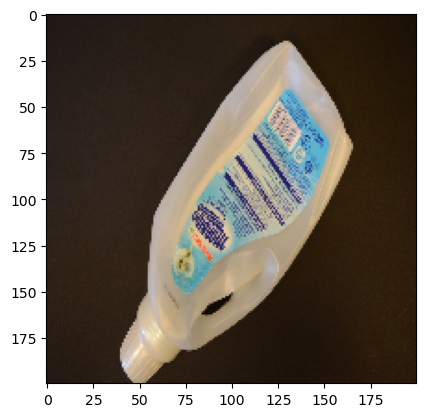

1/1 [==============================] - 0s 402ms/step
The waste is predicted to be PET


In [32]:
# from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.utils import load_img

assign = {0:'PET', 1:"Others", 2:"MG"}
# img_path = "C:/Dataset - FYP -Final Year Project/newDataset/PET/PET240.jpg"
img_path = 'C:/Dataset - FYP -Final Year Project/newDataset/Others/Others503.jpg'

img = load_img(img_path, target_size=(200,200))
plt.imshow(img)
plt.show()
img=np.array(img)

img = img.reshape(1, 200, 200, 3)
# img = img.reshape(1,224,224, 3)
# print("The waste is predicted to be "+assign[np.argmax(model.predict(img))])
print("The waste is predicted to be "+assign[np.argmax(model.predict(img))])